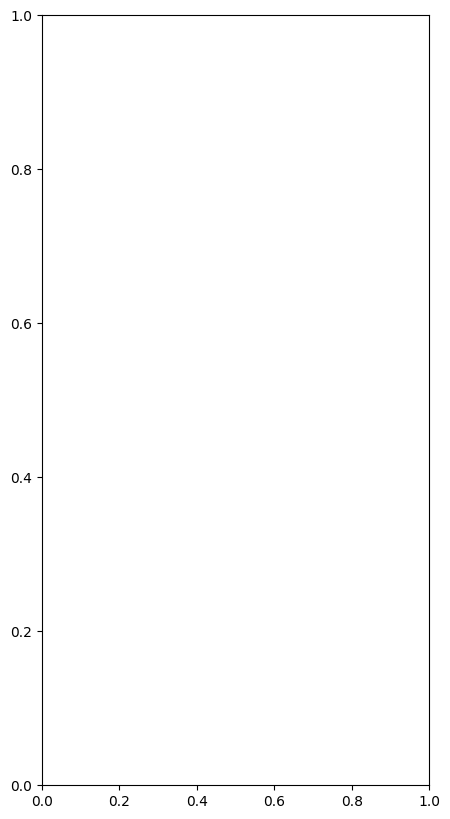

In [2]:
import numpy as np
import matplotlib
from Configs.RTM_config import *

import numpy as np
import copy
import gc
from tqdm import tqdm
from devito import gaussian_smooth, TimeFunction, Eq, Operator, solve, Function
from util import *
from examples.seismic import SeismicModel, AcquisitionGeometry, PointSource, Receiver, TimeAxis
from examples.seismic.acoustic import AcousticWaveSolver

In [3]:
from devito import configuration
configuration['log-level'] = 'WARNING'
#Using GPU
configuration['platform'] = 'nvidiaX'
configuration['compiler'] = 'pgcc'
configuration['language'] = 'openacc'

In [7]:
images = np.load('Results/images.npy')
np.unique(images[25])

array([-5.37381  , -4.2617736, -4.006843 , ...,  2.6383734,  2.7520044,
        3.0878472], dtype=float32)

In [11]:
model = SeismicModel(vp = model_vp.T/1000,
                         origin = model_param['origin'], 
                         shape = model_vp.T.shape, 
                         spacing = model_param['spacing'],
                         space_order=model_param['so'],
                         nbl=model_param['nbl'],
                         bcs=model_param['bcs'])

<Axes: xlabel='Distance, m', ylabel='Depth, m'>

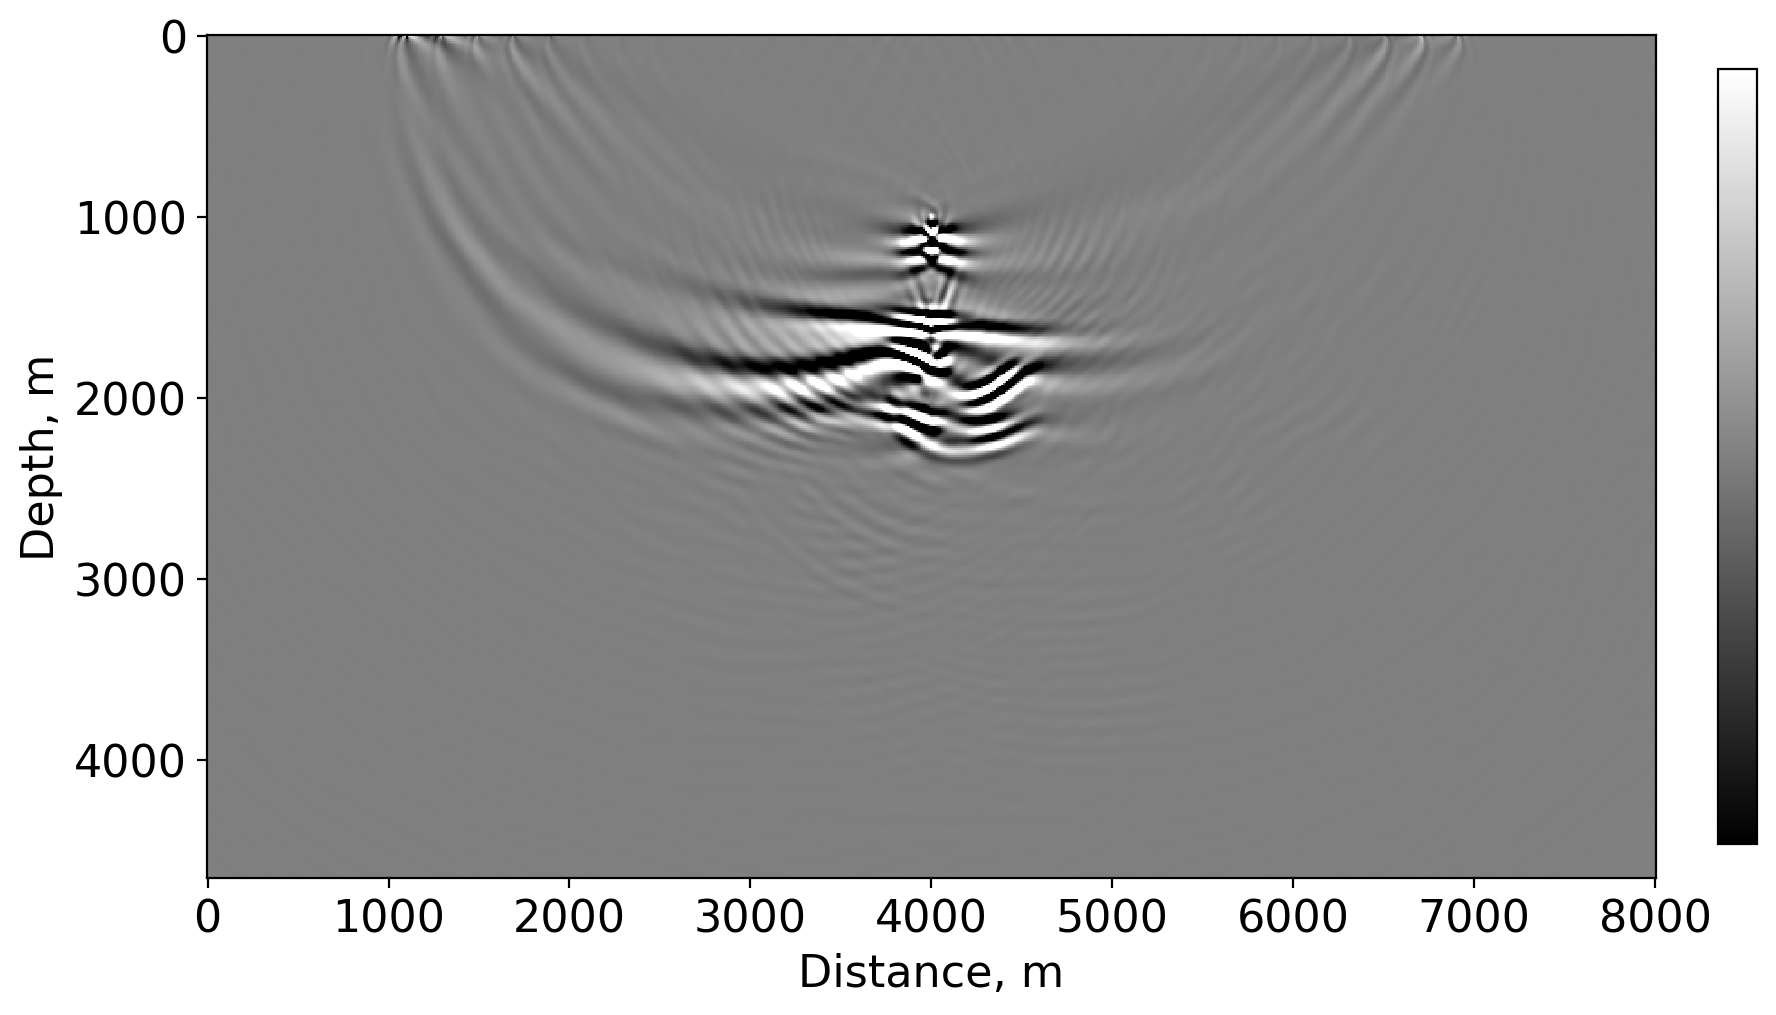

In [15]:
model_vp, xx, zz = readin_bin(model_param['path'], seek_num=0, nt=NT, nr=NR, dx=10, dz=10)
slices = [slice(20, -20), slice(20, -20)]
stack_image = np.zeros_like(np.diff(images[0], axis=1))
for im in images:
    stack_image += np.diff(im, axis=1)
    # stack_image += im[:, :-1]

# axs = plot_model(np.round(model_vp, -1), xx, zz, rec=None, src=None, show=False)
# axs.pcolormesh(xx.T[:, :-1], zz.T[:, :-1], stack_image[80:-80, 80:-80], alpha=0.7, cmap='gray', vmin=-np.quantile(stack_image[80:-80, 80:-80], 0.995), vmax=np.quantile(stack_image[80:-80, 80:-80], 0.995))
plot_image(stack_image[20:-20, 20:-20], xx.T[:, :-1], zz.T[:, :-1], quantile=0.995, )
# plt.show()

In [14]:
xx.T[:, :-1].shape

(801, 466)

In [13]:
stack_image.shape

(841, 506)